# Problem 1 (2 points)

Recall that for the original GAN, the discriminator $f_\phi(x)$ is trained with the following optimization:

$$\max_\phi p(x) \log [f_\phi(x)] + q_\theta(x) \log [1 - f_\phi(x)]$$

where $p(x)$ is the true data distribution, $q_\theta(x)$ is the generator's learned distribution, and $f_\phi(x) \in [0, 1]$.

1. Assuming $q_\theta(x)$ is fixed, what is the solution to this optimization problem? "Solution" here means the function $f_\phi(x)$ that maximizes the above objective. Your expression should be in terms of $p(x)$ and $q_\theta(x)$.
1. Assume that $q_\theta(x) = p(x)$, i.e. the generator has learned to fit the data distribution perfectly. What is the optimal discriminator in this case?

1. If we define, for all $\phi$ and $x$, $L$ as:

  $L(f_\phi(x)) = p(x) \log [f_\phi(x)] + q_\theta(x) \log [1 - f_\phi(x)]$   
  Then, taking the partial derivative of $L$ w.r.t $f_\phi(x)$ gives:   
  $
  \frac{\partial L}{\partial f_\phi(x)}(x) = \frac{p(x)}{f_\phi(x)} - \frac{q_\theta(x)}{1 - f_\phi(x)}
  $   
  To maximize $L$, we can set this expression to $0$ and solve for the optimal result $f_{\phi^{*}}(x)$:    
  $f_{\phi^{*}} = \frac{p(x)}{p(x)+q_\theta(x)}$

2. If the generator has learned to fit the data distribution perfectly, the   optimal discriminator is $f_{\phi^{*}} = \frac{1}{2}$, which means indicating it is equally uncertain whether $x$ is from the real or generated distribution as they are both equal.

# Problem 2 (1 point)

Recall that the forward process for the Diffusion model is defined as

$$q(x_t | x_{t - 1}) = \mathop{\mathscr{N}}\left(x_t; \sqrt{1 - \beta_t} x_{t - 1}, \beta_t I\right)$$

Let $\bar{a}_t = \prod_{s = 1}^t (1 - \beta_s)$. Show that

$$q(x_t | x_0) = \mathop{\mathscr{N}}\left(x_t; \sqrt{\bar{a}_t} x_0, (1 - \bar{a}_t) I\right)$$

Let's define, for $1 \leq i \leq t$, $\alpha_i = 1-\beta_i$. That way, $\bar{a}_t = \prod_{s = 1}^t \alpha_s$. Moreover, we can state the following property:    
($*$) If $X \sim \mathscr{N}(0, \sigma^2I)$ and $Y \sim \mathscr{N}(0, \gamma^2I)$ and X and Y are independant, then $X+Y \sim \mathscr{N}(0, (\sigma^2 + \gamma^2)I)$.   
Let's also define a sequence of independent Normal random variables: for $1 \leq i \leq t$, $y_i \sim \mathscr{N}(0, I)$, such that $x_i = \sqrt{\beta_i}y_i + \sqrt{\alpha_i}x_{i-1} $.


With that, we can derive:   
$x_t = \sqrt{\beta_t}y_t + \sqrt{\alpha_t}x_{t-1} = \sqrt{\beta_t}y_t + \sqrt{\alpha_t}(\sqrt{\beta_{t-1}}y_{t-1} + \sqrt{\alpha_{t-1}}x_{t-2}) = \sqrt{\beta_t}y_t + \sqrt{\alpha_t}\sqrt{\beta_{t-1}}y_{t-1} + \sqrt{\alpha_t\alpha_{t-1}}x_{t-2}$.     
Here, $z_{t} = \sqrt{\beta_t}y_t \sim \mathscr{N}(0, \beta_tI)$ and $\sqrt{\alpha_t}\sqrt{\beta_{t-1}}y_{t-1} \sim \mathscr{N}(0, \alpha_t\beta_{t-1}I)$.    

We can then define $z_{t-1} = z_{t} + \sqrt{\alpha_t}\sqrt{\beta_{t-1}}y_{t-1}$ and we can compute that $\beta_t + \alpha_t\beta_{t-1} = 1-\alpha_t + \alpha_t(1-\alpha_{t-1}) = 1-\alpha_{t}\alpha_{t-1}$.   
Therefore, with the independence of $z_t$ and $\sqrt{\alpha_t}\sqrt{\beta_{t-1}}y_{t-1}$ as combinations of independent variables, $z_{t-1}$ follows $\mathscr{N}(0, (1-\alpha_{t}\alpha_{t-1})I)$.

We now have: $x_t = z_{t-1} + \sqrt{\alpha_{t} \alpha_{t-1}}x_{t-2}$, and we can show by recurrence that:       
for $2 \leq i \leq t$, $x_t = z_{i-1} + \sqrt{\prod_{s = i-1}^t \alpha_s}x_{i-2}$ where $z_{i-1}$ follows $\mathscr{N}(0, (1-\prod_{s = i-1}^t \alpha_s)I)$:


We already initialized the recurrence by proving it for $i=t$. Let's suppose that it is true for $3 \leq i \leq t$, and let's prove it for $i-1$:    
$x_t = z_{i-1} + \sqrt{\prod_{s = i-1}^t \alpha_s}x_{i-2} = z_{i-1} + \sqrt{\prod_{s = i-1}^t \alpha_s}(\sqrt{1-\alpha_{i-2}}y_{i-2} + \sqrt{\alpha_{i-2}}x_{i-3})$     
$= z_{i-1} + \sqrt{\prod_{s = i-1}^t \alpha_s}\sqrt{1-\alpha_{i-2}}y_{i-2} + \sqrt{\prod_{s = i-2}^t \alpha_s}x_{i-3}$    
We define $z_{i-2} = z_{i-1} + \sqrt{\prod_{s = i-1}^t \alpha_s}\sqrt{1-\alpha_{i-2}}y_{i-2}$ as sum of two independent Gaussian variables, and we can compute its standard deviation squared thanks to ($*$):
$1-(\prod_{s = i-1}^t \alpha_s) + (\prod_{s = i-1}^t \alpha_s)(1-\alpha_{i-2})= 1 - (\prod_{s = i-2}^t \alpha_s)$.   
Therefore, we have proved the recurrence property, and we have:  
$x_t = z_1 + \sqrt{\prod_{s = 1}^t \alpha_s}x_{0}$, with $z_{1}$ following $\mathscr{N}(0, (1-\bar{a}_t)I)$, hence $x_t$ conditioned to $x_0$ follows $\mathscr{N}(\sqrt{\bar{a}_t}x_0, (1-\bar{a}_t)I)$

# Problem 3 (2 points)

Recall that, when training a VAE, we maximize the following objective:

$$\mathbb{E}_{z \sim q_\phi (z | x)} \log p_\theta(x | z) - \mathop{\text{KL}}(q_\phi(z | x) || p(z))$$

1. Show that this objective is equal to $\log p_\theta(x) - \mathop{\text{KL}}(q_\phi(z | x) || p(z | x))$ and explain why it is therefore less than or equal to $\log p_\theta(x)$.
1. Assume that $q(z)$ is a univariate Gaussian with mean $\mu = 0$ and standard deviation $\sigma \in \mathbb{R}$ and p(z) is a standard (zero-mean unit-variance) Gaussian. Derive a closed-form expression for $\mathop{\text{KL}}(q(z) || p(z))$ and plot it with respect to $\sigma$.

1. We have:   
$$\mathop{\text{KL}}(q_\phi(z | x) || p(z)) = ∫q_\phi(z | x) \log(\frac{q_\phi(z | x)}{p(z)})dz$$   
and   
$\mathbb{E}_{z \sim q_\phi (z | x)} \log p_\theta(x | z) = ∫q_\phi(z | x) \log(p_\theta(x | z))dz = ∫q_\phi(z | x) \log(\frac{p(z | x)p_\theta(x)}{p(z)})dz$   
$ = ∫q_\phi(z | x)\log(\frac{p(z | x)}{p(z)})dz +  ∫q_\phi(z | x) \log(p_\theta(x))dz = ∫q_\phi(z | x)\log(\frac{p(z | x)}{p(z)})dz + \log(p_\theta(x))$    
thanks to the Bayes theorem and because $∫q_\phi(z | x)dz = 1$.   
Therefore,    
$\mathbb{E}_{z \sim q_\phi (z | x)} \log p_\theta(x | z) - \mathop{\text{KL}}(q_\phi(z | x) || p(z)) = \log(p_\theta(x)) + ∫q_\phi(z | x)\log(\frac{p(z | x)p(z)}{q_\phi(z | x)p(z)})dz$   
= $\log(p_\theta(x)) - ∫q_\phi(z | x)\log(\frac{q_\phi(z | x)}{p(z | x)})dz = \log(p_\theta(x)) - \mathop{\text{KL}}(q_\phi(z | x) || p(z | x))$.    
We know by convexity of the $\log$ function that the KL-divergence is positive or null, so this quantity has to be less or equal to $ \log(p_\theta(x))$ because it is equal to $ \log(p_\theta(x))$  minus a positive quantity.

2. We have, thanks to the properties of the Gaussian distribution density function:   
$\mathop{\text{KL}}(q(z) || p(z)) = ∫_{\mathscr{R}} q(z) \log(\frac{q(z)}{p(z)})dz = ∫_{\mathscr{R}} \frac{e^{\frac{-x^2}{2 \sigma^2}}}{\sigma \sqrt{2\pi}} \log(\frac{\frac{e^{\frac{-x^2}{2 \sigma^2}}}{\sigma \sqrt{2\pi}}}{\frac{e^{\frac{-x^2}{2}}}{\sqrt{2\pi}}})dz = \frac{1}{\sigma \sqrt{2\pi}}∫_{\mathscr{R}} e^{\frac{-x^2}{2 \sigma^2}} \log(\frac{e^{\frac{-x^2}{2 \sigma^2}}}{\sigma \sqrt{2\pi}}\frac{\sqrt{2\pi}}{e^{\frac{-x^2}{2}}})dz$    
$= \frac{1}{\sigma \sqrt{2\pi}}∫_{\mathscr{R}} e^{\frac{-x^2}{2 \sigma^2}} \log(\frac{e^{\frac{-x^2}{2 \sigma^2}}}{\sigma}e^{\frac{x^2}{2}})dz = \frac{1}{\sigma \sqrt{2\pi}} ∫_{\mathscr{R}} e^{\frac{-x^2}{2 \sigma^2}}(\log(e^{\frac{x^2}{2}(1-\frac{1}{\sigma^2})}) - \log(\sigma))dz$
$ = -\log(\sigma) \frac{1}{\sigma \sqrt{2\pi}} ∫_{\mathscr{R}} e^{\frac{-x^2}{2 \sigma^2}}dz +  \frac{1}{\sigma \sqrt{2\pi}} ∫_{\mathscr{R}} e^{\frac{-x^2}{2 \sigma^2}}\frac{x^2}{2}(1-\frac{1}{\sigma^2})dz$    
$ = -\log(\sigma) + \frac{\sigma^2 -1}{2\sigma^2}\frac{1}{\sigma \sqrt{2\pi}} ∫_{\mathscr{R}} e^{\frac{-x^2}{2 \sigma^2}}x^2dz$ =     
$ = -\log(\sigma) + \frac{\sigma^2 -1}{2\sigma^2} \sigma^2 = -\log(\sigma) + \frac{\sigma^2 -1}{2}$   
because $\frac{1}{\sigma \sqrt{2\pi}}∫_{\mathscr{R}} e^{\frac{-x^2}{2 \sigma^2}}dz = 1$ and $\frac{1}{\sigma \sqrt{2\pi}}∫_{\mathscr{R}} e^{\frac{-x^2}{2 \sigma^2}}x^2dz = \sigma^2$.    
Let's plot this quantity:

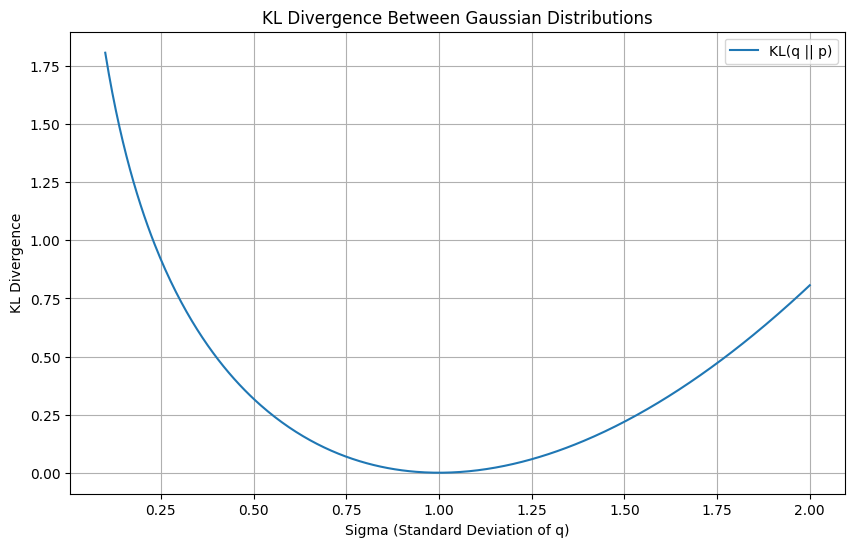

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma_values = np.linspace(0.1, 2, 400)

kl_divergence = -np.log(sigma_values) + (sigma_values**2 - 1) / 2

plt.figure(figsize=(10, 6))
plt.plot(sigma_values, kl_divergence, label='KL(q(z) || p(z))')
plt.title('KL Divergence Between the Gaussian Distributions q(z) and p(z)')
plt.xlabel('Sigma')
plt.ylabel('KL Divergence')
plt.grid(True)
plt.legend()
plt.show()

The minimum is reached when $q=p$ i.e $\sigma = 1$.